In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
ex7faces = pd.read_csv('ex7faces.csv',header=None)
X = ex7faces.as_matrix()

In [8]:
def displayData(X,row=None,col=None):
    m,n=X.shape
    w = h = int(np.sqrt(n))
    if row==None or col == None:
        row = col = int(np.sqrt(m))
    data = []
    index = 0
    for r in range(0,row):
        rows = []
        for c in range(0,col):
            rows.append(np.reshape(X[index,:],(w,h),order='F'))
            index = index + 1
        data.append(rows)
    
    rows = []
    for r in range(0,row):
        t = np.concatenate(tuple(data[r]),axis=1);
        rows.append(t);
    
    c = np.concatenate(tuple(rows));
    plt.imshow(c,cmap="gray")
    plt.axis('off')
    plt.show();

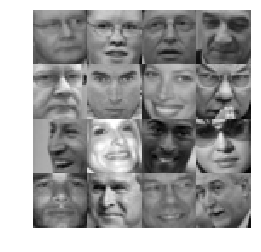

In [10]:
displayData(X[1:25,:])

(36, 1024)


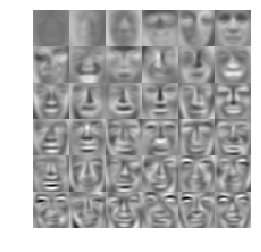

In [16]:
scaler = StandardScaler().fit(X)
x_norm = scaler.fit_transform(X)

pca = PCA(n_components=36).fit(x_norm)
print(pca.components_.shape)
displayData(pca.components_)

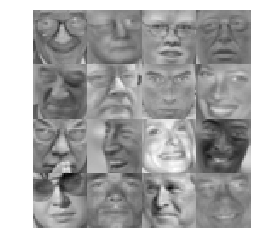

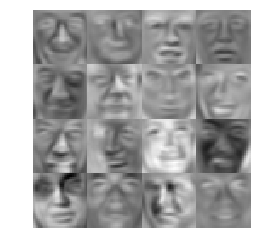

In [19]:
pca100 = PCA(n_components=100).fit(x_norm)
Z = pca100.fit_transform(x_norm)
x_rec = pca100.inverse_transform(Z)

displayData(x_norm[0:16])
displayData(x_rec[0:16])